# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

### Perform API Calls
- Perform a weather check on each city using a series of successive API calls.  Pull and store the following data:
    - Temperature (F)
    - Humidity (%)
    - Cloudiness (%)
    - Wind Speed (mph)
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Create lists to store the requested data
tempF = []
maxTempF = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
lat = []
lng = []

In [4]:
# Pull a sample of the weather response data for reference
sampleURL = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial&q=london"
sampleResponse = requests.get(sampleURL)
sampleJSON = sampleResponse.json()
pp.pprint(sampleJSON)

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1569648185,
 'id': 2643743,
 'main': {'humidity': 82,
          'pressure': 1007,
          'temp': 54.1,
          'temp_max': 57.2,
          'temp_min': 51.01},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.0092,
         'sunrise': 1569650132,
         'sunset': 1569692820,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 10.29}}


In [5]:
testing = sampleJSON['coord']['lon']
testing

-0.13

In [6]:
# Create the base URL
baseURL = "http://api.openweathermap.org/data/2.5/weather?appid="
cityNumber = 1
totalCities = len(cities)

# Loop to pull weather data on each city in the list
for city in cities:
    print(f"Pulling city #{cityNumber} of {totalCities}: {city}")
    try:
        query_url = baseURL + weather_api_key + "&units=imperial&q=" + city
        
        
        response = requests.get(query_url)
        responseJSON = response.json()
        tempF.append(responseJSON['main']['temp'])
        humidity.append(responseJSON['main']['humidity'])
        cloudiness.append(responseJSON['clouds']['all'])
        windspeed.append(responseJSON['wind']['speed'])
        country.append(responseJSON['sys']['country'])
        maxTempF.append(responseJSON['main']['temp_max'])
        date.append(responseJSON['dt'])
        lat.append(responseJSON['coord']['lat'])
        lng.append(responseJSON['coord']['lon'])        
    except:
        print("Bad Response")
    cityNumber += 1

Pulling city #1 of 578: jalu
75.87
Pulling city #2 of 578: ushuaia
46.4
Pulling city #3 of 578: avarua
73.4
Pulling city #4 of 578: bowen
84.2
Pulling city #5 of 578: albany
59
Pulling city #6 of 578: hermanus
64.99
Pulling city #7 of 578: nikolskoye
46
Pulling city #8 of 578: dingle
85.72
Pulling city #9 of 578: atuona
79.83
Pulling city #10 of 578: biak
70.64
Pulling city #11 of 578: boende
76.38
Pulling city #12 of 578: yellowknife
33.8
Pulling city #13 of 578: nizhneyansk
Bad Response
Pulling city #14 of 578: mahebourg
77
Pulling city #15 of 578: kollam
86
Pulling city #16 of 578: mahon
55
Pulling city #17 of 578: bosaso
87.8
Pulling city #18 of 578: micheweni
76.77
Pulling city #19 of 578: kuche
Bad Response
Pulling city #20 of 578: dunedin
54
Pulling city #21 of 578: tahta
Bad Response
Pulling city #22 of 578: znamenskoye
39.37
Pulling city #23 of 578: bengkulu
Bad Response
Pulling city #24 of 578: sao jose da coroa grande
67.76
Pulling city #25 of 578: cherskiy
33.36
Pulling cit

71.6
Pulling city #200 of 578: preobrazheniye
71.23
Pulling city #201 of 578: carndonagh
55.32
Pulling city #202 of 578: christchurch
64
Pulling city #203 of 578: antofagasta
57.2
Pulling city #204 of 578: faya
66.2
Pulling city #205 of 578: aksu
48.2
Pulling city #206 of 578: emerald
89.01
Pulling city #207 of 578: catamarca
Bad Response
Pulling city #208 of 578: maceio
69.8
Pulling city #209 of 578: husavik
43
Pulling city #210 of 578: hamilton
71.01
Pulling city #211 of 578: alexandria
64
Pulling city #212 of 578: tasiilaq
37.4
Pulling city #213 of 578: samarai
76.92
Pulling city #214 of 578: viedma
59.5
Pulling city #215 of 578: awbari
74.13
Pulling city #216 of 578: ixtapa
84.2
Pulling city #217 of 578: bukachacha
46.08
Pulling city #218 of 578: fereydunshahr
66.37
Pulling city #219 of 578: langsa
82.55
Pulling city #220 of 578: bethel
48.2
Pulling city #221 of 578: comiso
66.2
Pulling city #222 of 578: osa
36.51
Pulling city #223 of 578: lagoa
64.99
Pulling city #224 of 578: usin

69.8
Pulling city #397 of 578: ginda
78.8
Pulling city #398 of 578: zhigansk
37.52
Pulling city #399 of 578: salamiyah
74.54
Pulling city #400 of 578: kihei
80.6
Pulling city #401 of 578: manono
83.8
Pulling city #402 of 578: ust-nera
29.94
Pulling city #403 of 578: sao filipe
77.48
Pulling city #404 of 578: corinto
73.4
Pulling city #405 of 578: tazovskiy
35.07
Pulling city #406 of 578: saint austell
59
Pulling city #407 of 578: bonavista
54
Pulling city #408 of 578: uglegorsk
63.06
Pulling city #409 of 578: weligama
81.53
Pulling city #410 of 578: jieshi
89.01
Pulling city #411 of 578: malinyi
77.78
Pulling city #412 of 578: paidha
68.06
Pulling city #413 of 578: asekeyevo
45.29
Pulling city #414 of 578: valley city
46.4
Pulling city #415 of 578: agadez
75.2
Pulling city #416 of 578: xiongshi
Bad Response
Pulling city #417 of 578: ahipara
62.01
Pulling city #418 of 578: waipawa
53.01
Pulling city #419 of 578: kulhudhuffushi
82.98
Pulling city #420 of 578: kegayli
Bad Response
Pulling

In [7]:
# Zip up the lists
zippedList =  list(zip(cities, cloudiness, country, date, humidity, lat, lng, maxTempF, tempF, windspeed))
zippedList

[('jalu', 0, 'LY', 1569648341, 56, 29.03, 21.55, 75.87, 75.87, 2.51),
 ('ushuaia', 40, 'AR', 1569648172, 70, -54.81, -68.31, 46.4, 43.27, 4.16),
 ('avarua', 28, 'CK', 1569648079, 73, -21.21, -159.78, 73.4, 73.4, 6.93),
 ('bowen', 8, 'AU', 1569648342, 48, -20.01, 148.25, 84.2, 84.2, 10.29),
 ('albany', 20, 'US', 1569648232, 71, 42.65, -73.75, 59, 52.05, 2.35),
 ('hermanus', 100, 'ZA', 1569648104, 85, -34.42, 19.24, 64.99, 63.88, 10),
 ('nikolskoye', 90, 'RU', 1569648343, 93, 59.7, 30.79, 46, 43.07, 4.47),
 ('dingle', 99, 'PH', 1569648012, 72, 11, 122.67, 85.72, 85.72, 5.99),
 ('atuona', 6, 'PF', 1569648343, 75, -9.8, -139.03, 79.83, 79.83, 16.8),
 ('biak', 100, 'ID', 1569648289, 80, -0.91, 122.88, 70.64, 70.64, 3.38),
 ('boende', 94, 'CD', 1569648344, 81, -0.28, 20.88, 76.38, 76.38, 1.32),
 ('yellowknife', 75, 'CA', 1569648344, 80, 62.45, -114.38, 33.8, 33.37, 10.29),
 ('nizhneyansk', 40, 'MU', 1569648344, 65, -20.41, 57.7, 77, 77, 14.99),
 ('mahebourg', 20, 'IN', 1569648345, 74, 8.88, 

In [8]:
# Create a dataframe from zipped list
weather_df = pd.DataFrame(zippedList, columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Latitude', 'Longitude', 'MaxTemp', 'Temp', 'Windspeed']) 
weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,MaxTemp,Temp,Windspeed
0,jalu,0,LY,1569648341,56,29.03,21.55,75.87,75.87,2.51
1,ushuaia,40,AR,1569648172,70,-54.81,-68.31,46.40,43.27,4.16
2,avarua,28,CK,1569648079,73,-21.21,-159.78,73.40,73.40,6.93
3,bowen,8,AU,1569648342,48,-20.01,148.25,84.20,84.20,10.29
4,albany,20,US,1569648232,71,42.65,-73.75,59.00,52.05,2.35
...,...,...,...,...,...,...,...,...,...,...
511,katsuura,75,JP,1569648493,74,36.58,137.08,78.80,77.94,6.93
512,baghdad,0,BR,1569648493,61,-10.70,-48.41,80.60,80.60,4.70
513,nagato,100,RU,1569648493,84,53.46,85.45,49.41,49.41,19.04
514,kotido,5,VE,1569648493,89,8.89,-64.17,73.64,73.64,9.22


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df.to_csv("../output_data/weather_data.csv")
print("Export Complete")

Export Complete


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
#Set the X and Y axis variables
x_axis = weather_df.Latitude
y_axis = weather_df.MaxTemp

In [11]:
# Set "now"
now = datetime.datetime.now()

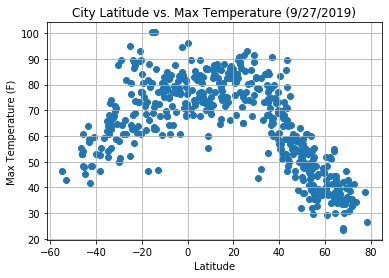

In [12]:
# Plot
plt.scatter(x_axis, y_axis, marker='o')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({now.month}/{now.day}/{now.year})")
plt.grid()
plt.show
plt.savefig('../output_data/fig1.png')

#### Latitude vs. Humidity Plot

In [13]:
#Set the X and Y axis variables
x_axis = weather_df.Latitude
y_axis = weather_df.Humidity

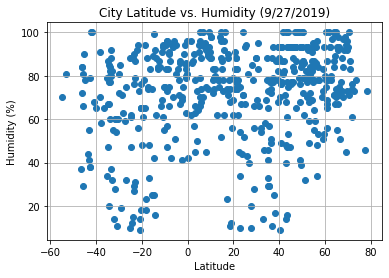

In [14]:
# Plot
plt.scatter(x_axis, y_axis, marker='o')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({now.month}/{now.day}/{now.year})")
plt.grid()
plt.show
plt.savefig('../output_data/fig2.png')

#### Latitude vs. Cloudiness Plot

In [15]:
#Set the X and Y axis variables
x_axis = weather_df.Latitude
y_axis = weather_df.Cloudiness

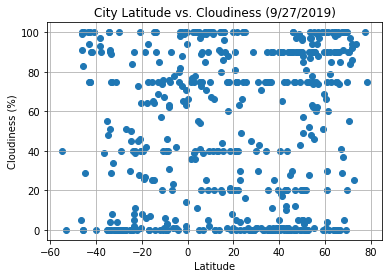

In [16]:
# Plot
plt.scatter(x_axis, y_axis, marker='o')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({now.month}/{now.day}/{now.year})")
plt.grid()
plt.show
plt.savefig('../output_data/fig3.png')

#### Latitude vs. Wind Speed Plot

In [17]:
#Set the X and Y axis variables
x_axis = weather_df.Latitude
y_axis = weather_df.Windspeed

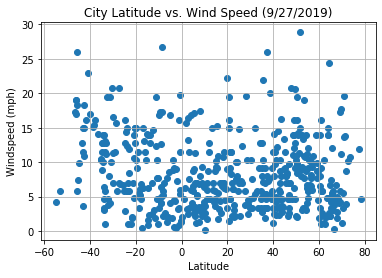

In [18]:
# Plot
plt.scatter(x_axis, y_axis, marker='o')
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({now.month}/{now.day}/{now.year})")
plt.grid()
plt.show
plt.savefig('../output_data/fig4.png')

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
hemisphereNorth = weather_df[weather_df['Latitude'].astype(float)>0]
hemisphereSouth = weather_df[weather_df['Latitude'].astype(float)<0]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6084585635327757


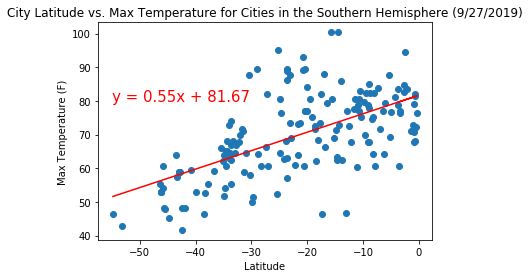

In [23]:
#Set the X and Y axis variables
x_axis = hemisphereSouth.Latitude.astype(float)
y_axis = hemisphereSouth.MaxTemp.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature for Cities in the Southern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig5.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.8464918182571072


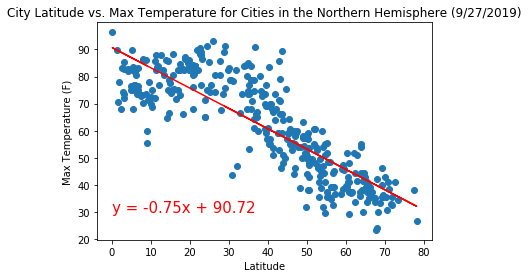

In [40]:
#Set the X and Y axis variables
x_axis = hemisphereNorth.Latitude.astype(float)
y_axis = hemisphereNorth.MaxTemp.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature for Cities in the Northern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig6.png')

## Observations:
- Regression shows that there is a weak correlation between latitude and max temperature in the southern hemisphere
- Regression shows that there is a strong negative correlation between latitude and max temperature in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.20249681003082784


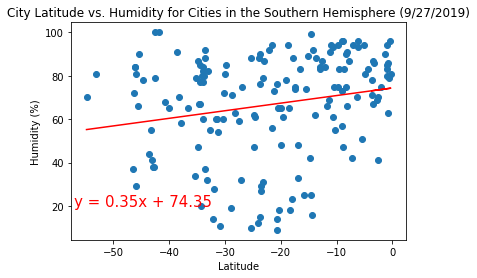

In [41]:
#Set the X and Y axis variables
x_axis = hemisphereSouth.Latitude.astype(float)
y_axis = hemisphereSouth.Humidity.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity for Cities in the Southern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig7.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.05980660015706249


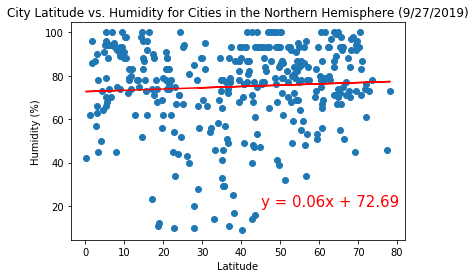

In [42]:
#Set the X and Y axis variables
x_axis = hemisphereNorth.Latitude.astype(float)
y_axis = hemisphereNorth.Humidity.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity for Cities in the Northern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig8.png')

## Observations:
- Regressions shows that there is no correlation between latitude and humidity in either hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.024292682801840885


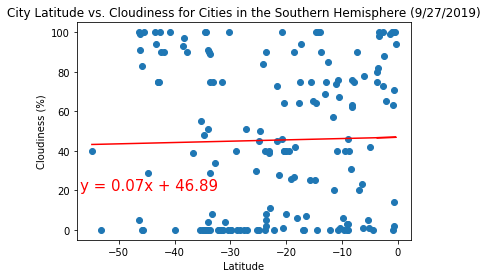

In [43]:
#Set the X and Y axis variables
x_axis = hemisphereSouth.Latitude.astype(float)
y_axis = hemisphereSouth.Cloudiness.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness for Cities in the Southern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig9.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.05980660015706249


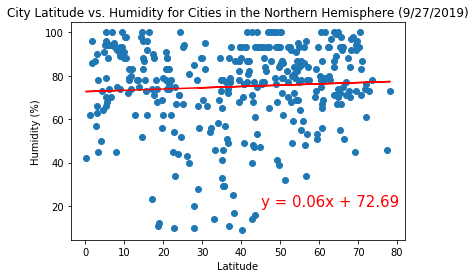

In [44]:
#Set the X and Y axis variables
x_axis = hemisphereNorth.Latitude.astype(float)
y_axis = hemisphereNorth.Humidity.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity for Cities in the Northern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig10.png')

## Observations:
- Regression shows that there is no correlation between latitude and humidity in either hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.08123458839697116


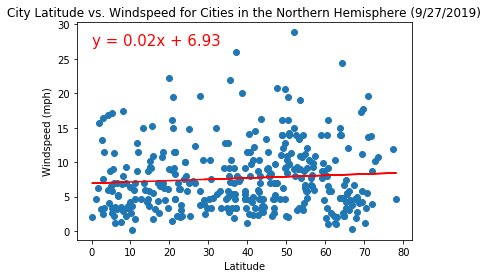

In [45]:
#Set the X and Y axis variables
x_axis = hemisphereNorth.Latitude.astype(float)
y_axis = hemisphereNorth.Windspeed.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title(f"City Latitude vs. Windspeed for Cities in the Northern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.35125505629648335


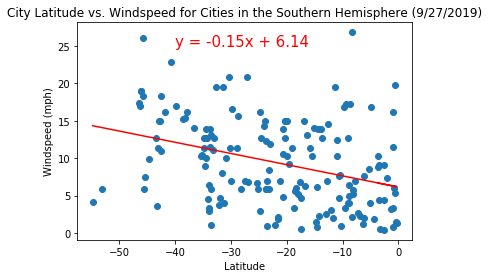

In [46]:
#Set the X and Y axis variables
x_axis = hemisphereSouth.Latitude.astype(float)
y_axis = hemisphereSouth.Windspeed.astype(float)

# Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title(f"City Latitude vs. Windspeed for Cities in the Southern Hemisphere ({now.month}/{now.day}/{now.year})")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.show
print(f"The r-squared value is: {rvalue}")
plt.savefig('../output_data/fig12.png')

## Observations:
- Regression shows that there is no correlation between latitude and windspeed in either hemisphere